In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

In [45]:
np.random.seed(10)
n_observations=1000

feature1=np.random.multivariate_normal([0,0], [[2,.75],[.75,1]], n_observations)
feature2=np.random.multivariate_normal([1.5,4], [[2,.75],[.75,1]], n_observations)

#Creating matrix
X=np.vstack((feature1,feature2)).astype(np.float32)
#Creating vector
y=np.hstack((np.zeros(n_observations),
            np.ones(n_observations)))


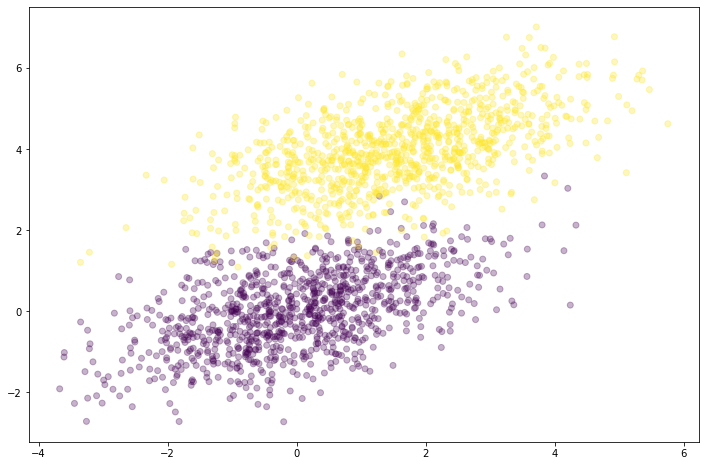

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],
            c = y, alpha = .3)

# Sigmoid Function

In [47]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# Cost function

In [48]:
def costFunction(h, y):
    return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()

# Gradient

In [50]:
gradient= np.dot(X.T, (h-y)) / y.shape[0]

# Probabilities 

In [51]:
def predict_proba(X, theta):
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold=0.5):
    return predict_probs(X, theta) >=threshold

# Putting it all together

In [97]:
class LogisticRegression:
    
    def __init__(self, alpha=0.01, num_iter=10000,
                 fit_intercept=True, verbose=False):
        self.alpha = alpha
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        
    def sigmoid(self, z):
        return 1/(1/+np.exp(-z))
    
    def add_intercept(self, X):
        intercept=np.ones((X.shape[0],1))
        return np.hstack((intercept, X))
    
    def costFunction(self, X, y):
        return (-y * np.log(h)-(1-y)* np.log(1-h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta=np.zeros(X.shape[1])
        
        for i in range (self.num_iter):
            z=np.dot(X, self.theta)
            #hypothesis
            h=self.sigmoid(z)
            #gradient
            gradient = np.dot(X.T, y-h) / y.size
            #update weights
            self.theta -= self.alpha * gradient
        
    
    def predict_prob(self, X):
        X=self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold
                
            

# Split data into train and test

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2,
                                                 random_state=12)

In [105]:
model = LogisticRegression(alpha=0.1, num_iter=1000)
model.fit(X_train,y_train)

In [106]:
y_pred=model.predict(X_test)
y_pred

array([False,  True, False,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False,  True,

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       207
         1.0       1.00      0.80      0.89       193

    accuracy                           0.90       400
   macro avg       0.92      0.90      0.90       400
weighted avg       0.92      0.90      0.90       400

